# Creating a barrier book in python

In [5]:
import math
from scipy.stats.distributions import norm
import matplotlib.pyplot as plt

In [6]:
error = True
message = "This input is incorrect. Please enter p for put or c for call"
while error:
    error = False
    putCall = raw_input("Do you want to price a put(p) or a call(c) option? " )
    if putCall == 'p':
        phi = -1
    elif putCall == 'c':
        phi = 1
    else:
        print message
        error = True

Do you want to price a put(p) or a call(c) option? 
This input is incorrect. Please enter p for put or c for call
Do you want to price a put(p) or a call(c) option? c


In [7]:
S =input("Please enter the current Stock price- ")
X = input("Please enter the strike price of the option- ")
T= input("Please enter the time to maturity(in days)- ")
T = float(T)/365

Please enter the current Stock price- 27
Please enter the strike price of the option- 30
Please enter the time to maturity(in days)- 268


In [8]:
sigma = input("Please enter the volatility of the underlying asset- ")
b = input("Please enter the carry rate- ")
r = input("Please enter the yearly interest rate- ")
r = r

Please enter the volatility of the underlying asset- 0.4
Please enter the carry rate- 0.012
Please enter the yearly interest rate- 6.72


In [9]:
H = input("Please enter the barrier height- " )

Please enter the barrier height- 28


In [10]:
K = input("How high is the rebate you receive if you get knocked out?- ")

How high is the rebate you receive if you get knocked out?- 0


In [11]:
message3 ="Please enter out or in."
error3 = True
while error3:
    inOut = raw_input("Please type whether it is an out or an in barrier.(out/in)- ")
    if inOut == 'out'or inOut == 'in':
        error3 = False
    else:
        print message3

Please type whether it is an out or an in barrier.(out/in)- in


In [12]:
X = float(X)
b = float(b)
H = float(H)
K = float(K)
S = float(S)

In [13]:
####Function for evaluating the option price given the underlying price

In [14]:
def price_option(S):
    if putCall == 'c':
        phi = 1
    else:
        phi = -1
    if S>H:
        eta = 1
    else:
        eta = -1
    sigma2 = sigma**2
    mu = (b-(sigma2 / 2))/sigma2
    landa = math.sqrt(mu**2.0 + (2*r)/(sigma2))
    x1 = (math.log(S/X)) / (sigma*math.sqrt(T)) + (1+mu)*sigma*math.sqrt(T)
    x2 = (math.log(S/H)) / (sigma*math.sqrt(T)) + (1+mu)*sigma*math.sqrt(T)
    y1 = math.log((H**2)/(S*X)) / (sigma*math.sqrt(T)) + (1+mu)*sigma*math.sqrt(T)
    y2 = math.log(H/S) / (sigma*math.sqrt(T)) + (1+mu)*sigma*math.sqrt(T)
    z = math.log(H/S) / (sigma*math.sqrt(T)) + landa*sigma*math.sqrt(T)
    n1=phi*x1-phi*sigma*math.sqrt(T)
    A= phi * S*math.exp(b-r)*norm.cdf(phi*x1,0,1) - phi*X*math.exp(-r*T)*norm.cdf(n1,0,1)
    n2=phi*x2-phi*sigma*math.sqrt(T)
    B= phi * S*math.exp(b-r)*norm.cdf(phi*x2,0,1) - phi*X*math.exp(-r*T)*norm.cdf(n2,0,1)
    n3=eta*y1
    n4=eta*y1-eta*sigma*math.sqrt(T)
    C= phi * S*math.exp(b-r)*(H/S)**(2*(mu+1))*norm.cdf(n3,0,1) - phi*X*math.exp(-r*T)*(H/S)
    n5=eta*y2
    n6=eta*y2-eta*sigma*math.sqrt(T)
    D= phi * S*math.exp(b-r)*(H/S)**(2*(mu+1))*norm.cdf(n5,0,1) - phi*X*math.exp(-r*T)*(H/S)
    n9 = norm.cdf(eta*x2 - eta*sigma*math.sqrt(T),0,1)
    n10 = norm.cdf(eta*y2 - eta*sigma*math.sqrt(T),0,1)
    E = K*math.exp(-r*T)*(n9 - (H/S)**(2*mu)*n10)
    n11 = norm.cdf(z*eta, 0,1)
    n12 = norm.cdf(eta*z-2*eta*landa*sigma*math.sqrt(T),0,1)
    F = K*math.exp(-r*T)*((H/S)**(mu+landa)*(n11)-(H/S)**(mu-landa)*n12)
    
    if putCall == 'p':
        if X < H:
            if S > H:
                if inOut == 'in':
                    price = A + E
                elif inOut == 'out':
                    price = F
            else:
                if inOut == 'in':
                    price = C + E
                elif inOut == 'out':
                    price = A - C + F
        else:
            if S > H:
                if inOut == 'in':
                    price = B - C + D + E
                elif inOut == 'out':
                    price = A - B + C - D + F
            else:
                if inOut == 'in':
                    price = A - B + D + E
                elif inOut == 'out':
                    price = B - D + F
    else:
        if X < H:
            if S > H:
                if inOut == 'in':
                    price = A - B + D + E
                elif inOut == 'out':
                    price = B - D + F
            else:
                if inOut == 'in':
                    price = B - C + D + E
                elif inOut == 'out':
                    price = A - B + C - D + F
        else:
            if S > H:
                if inOut == 'in':
                    price = C + E
                elif inOut == 'out':
                    price = A - C + F
            else:
                if inOut == 'in':
                    price = A + E
                elif inOut == 'out':
                    price = F
    if price < 0:
        price = 0
    return price

In [15]:
##Underlying price
print price_option(S)
S=int(S)
u_price = range(S-25, S+50)
##Option price
op_price = []
for i in range(len(u_price)):
    op_price.append(price_option(u_price[i]))
print u_price
print op_price

0
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


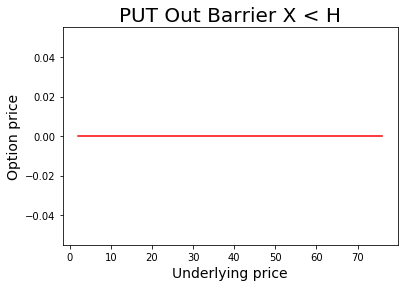

In [16]:
#Plotting the underlying price vs. the option price
plt.plot(u_price, op_price, color='red')
plt.xlabel('Underlying price', fontsize=14)
plt.ylabel('Option price',fontsize=14)
plt.title('PUT Out Barrier X < H', fontsize=20)
plt.show()

In [17]:
import QuantLib as ql # version 1.5
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# option data
maturity_date = ql.Date(15, 1, 2016)
spot_price = 127.62
strike_price = 130
volatility = 0.20 # the historical vols for a year
dividend_rate =  0.0163
option_type = ql.Option.Call

risk_free_rate = 0.001
day_count = ql.Actual365Fixed()
calendar = ql.UnitedStates()

calculation_date = ql.Date(8, 5, 2015)
ql.Settings.instance().evaluationDate = calculation_date

In [19]:
# construct the European Option
payoff = ql.PlainVanillaPayoff(option_type, strike_price)
exercise = ql.EuropeanExercise(maturity_date)
european_option = ql.VanillaOption(payoff, exercise)

In [93]:
from datetime import datetime

d= datetime.strptime(raw_input('Enter Start date in the format m/d/y: '), '%m/%d/%Y')
quantDate = ql.Date(d.day, d.month, d.year)

Enter Start date in the format m/d/y: 05/04/2015


In [94]:
quantDate

Date(4,5,2015)

In [91]:
d = datetime.strptime('2011-03-07','%Y-%m-%d')
quantDate = ql.Date(d.day, d.month, d.year)

In [92]:
quantDate

Date(7,3,2011)

In [95]:
spot_handle = ql.QuoteHandle(ql.SimpleQuote(spot_price))
flat_ts = ql.YieldTermStructureHandle(ql.FlatForward(quantDate, risk_free_rate, day_count))
dividend_yield = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date, dividend_rate, day_count))
flat_vol_ts = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(calculation_date, calendar, volatility, day_count))
bsm_process = ql.BlackProcess(spot_handle,flat_ts,flat_vol_ts)

In [21]:
european_option.setPricingEngine(ql.AnalyticEuropeanEngine(bsm_process))
bs_price = european_option.NPV()
print "The theoretical price is ", bs_price

The theoretical price is  7.38734748882


In [22]:
def binomial_price(bsm_process, steps):
    binomial_engine = ql.BinomialVanillaEngine(bsm_process, "crr", steps)
    european_option.setPricingEngine(binomial_engine)
    return european_option.NPV()

steps = range(2, 100, 1)
prices = [binomial_price(bsm_process, step) for step in steps]

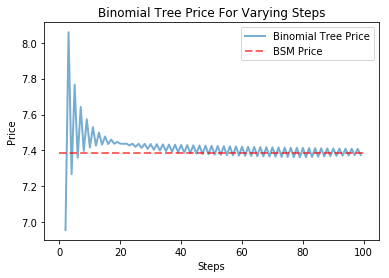

In [23]:
plt.plot(steps, prices, label="Binomial Tree Price", lw=2, alpha=0.6)
plt.plot([0,100],[bs_price, bs_price], "r--", label="BSM Price", lw=2, alpha=0.6)
plt.xlabel("Steps")
plt.ylabel("Price")
plt.title("Binomial Tree Price For Varying Steps")
plt.legend()

# Monte carlo

In [24]:
engine = ql.MCEuropeanEngine(bsm_process, "PseudoRandom",timeSteps=20,requiredSamples=250000)
european_option.setPricingEngine(engine)

In [25]:
european_option.NPV()

7.368223076575286

In [26]:
print european_option.delta()
print european_option.gamma()
print european_option.vega()

RuntimeError: delta not provided

# Finite Difference

In [27]:
engine = ql.FDEuropeanEngine(bsm_process,801,801)
european_option.setPricingEngine(engine)

In [28]:
european_option.NPV()

7.387251162785308

In [29]:
print european_option.delta()
print european_option.gamma()

0.488456890685
0.0187906031794


# Creating a barrier

In [51]:
today= ql.Date(29, 5, 2006)
ql.Settings.instance().evaluationDate = today

In [31]:
#the option to replicate
barrierType = ql.Barrier.DownOut
barrier = 70.0
rebate = 0.0
option_type1 = ql.Option.Put
underlyingValue = 100.0

In [32]:
strike = 100.0

In [33]:
spot_handle = ql.QuoteHandle(ql.SimpleQuote(underlyingValue))
risk_free_rate = ql.QuoteHandle(ql.SimpleQuote(0.04))
vol = ql.QuoteHandle(ql.SimpleQuote(0.2))

In [34]:
maturity = today + 1*ql.Years

In [35]:
# bootstrap the yield/vol curves
day_count = ql.Actual365Fixed()
flat_ts = ql.YieldTermStructureHandle(ql.FlatForward(0, ql.NullCalendar(),risk_free_rate , day_count))
flat_vol_ts = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(0, ql.NullCalendar(), vol, day_count))

In [36]:
#instantiate the option
payoff1 = ql.PlainVanillaPayoff(option_type1, strike)
exercise1 = ql.EuropeanExercise(maturity)

In [37]:
bsp = ql.BlackProcess(spot_handle,flat_ts,flat_vol_ts)

In [38]:
barrier_engine = ql.FdBlackScholesBarrierEngine(bsp)

In [39]:
europeanEngine = ql.AnalyticEuropeanEngine(bsp)

In [48]:
van_option = ql.VanillaOption(payoff1, exercise1)

In [49]:
van_option.setPricingEngine(ql.AnalyticEuropeanEngine(bsp))
bs_price = van_option.NPV()
print "The theoretical price is ", bs_price

The theoretical price is  0.723111928367


In [40]:
referenceOption = ql.BarrierOption(barrierType, barrier, rebate,payoff1, exercise1)

In [41]:
referenceOption.setPricingEngine(barrier_engine)

In [42]:
Value = referenceOption.NPV()

In [43]:
Value

0.7230488197758365

In [97]:
#USing analytical Barrier
barrier_engine = ql.AnalyticBarrierEngine(bsp)


In [98]:
referenceOption.setPricingEngine(barrier_engine)

In [99]:
referenceOption.NPV()

0.7231119283668335

In [109]:
#Using Binoomial Barrier
barrier_engine = ql.BinomialBarrierEngine(bsp,'crr',200)

In [110]:
referenceOption.setPricingEngine(barrier_engine)

In [111]:
referenceOption.NPV()

0.7222086080314538

In [113]:
#Monte Carlo Barrier
barrier_engine = ql.MCBarrierEngine(bsp, "PseudoRandom",timeSteps=20,requiredSamples=250000)

In [115]:
referenceOption.setPricingEngine(barrier_engine)

In [116]:
referenceOption.NPV()

0.7216271359647999

In [44]:
 referenceOption.delta()

-0.4961168724759953

In [45]:
referenceOption.gamma()

0.2215949268455051

In [46]:
referenceOption.theta()

-48.35998599088586

## Barrier functions

In [130]:
def BarrierCalculator(runDate,barrierType,barrier_value,rebate,option,spot,strike,risk_free_rate
                      ,vol,maturity, dividend_rate,engine):
    # set valuation date 
    ql.Settings.instance().evaluationDate = runDate
    
    # Set the Barrier type
    if barrierType == "UpIn":
        barrier = ql.Barrier.UpIn
    elif barrierType == "UpOut":
        barrier = ql.Barrier.UpOut
    elif barrierType == "DownIn":
        barrier = ql.Barrier.DownIn
    else:
        barrier = ql.Barrier.DownOut
    
    # Set the Option type
    if option == 'c':
        option_type = ql.Option.Call
    else:
        option_type = ql.Option.Put
    # Handle values
    spot = ql.QuoteHandle(ql.SimpleQuote(spot))
    risk_free_rate = ql.QuoteHandle(ql.SimpleQuote(risk_free_rate))
    vol = ql.QuoteHandle(ql.SimpleQuote(vol))
    # Set calender to South Africa
    calendar = ql.SouthAfrica()
    
    # construct the European Option
    payoff = ql.PlainVanillaPayoff(option_type, strike)
    exercise = ql.EuropeanExercise(maturity)
    european_option = ql.VanillaOption(payoff, exercise)
    
    # bootstrap the yield/vol curves
    day_count = ql.Actual365Fixed()
    flat_ts = ql.YieldTermStructureHandle(ql.FlatForward(runDate,risk_free_rate, day_count))
    flat_vol_ts = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(runDate, calendar, vol, day_count))
    dividend_yield = ql.YieldTermStructureHandle(ql.FlatForward(runDate,dividend_rate, day_count))
    
    # Black Scholes model
    bsm = ql.GeneralizedBlackScholesProcess(spot,dividend_yield,flat_ts,flat_vol_ts)
    
    # Vanilla Option
    van_option = ql.VanillaOption(payoff, exercise)
    van_option.setPricingEngine(ql.AnalyticEuropeanEngine(bsm))
    
    # barrier Option
    Barrier_option = ql.BarrierOption(barrier, barrier_value, rebate,payoff, exercise)
    
    # Barrier engine
    if engine == 'AB':
        barrier_engine = ql.AnalyticBarrierEngine(bsm)
        Barrier_option.setPricingEngine(barrier_engine)
    elif engine == 'BB':
        barrier_engine = ql.BinomialBarrierEngine(bsm,'crr',200)
        Barrier_option.setPricingEngine(barrier_engine)
    elif engine == 'FD':
        barrier_engine = ql.FdBlackScholesBarrierEngine(bsm)
        Barrier_option.setPricingEngine(barrier_engine)
    else:
        barrier_engine = ql.MCBarrierEngine(bsm, "PseudoRandom",timeSteps=20,requiredSamples=250000)
        Barrier_option.setPricingEngine(barrier_engine)
    value = Barrier_option.NPV()
    return value
    

In [134]:
# Test Function
runDate= ql.Date(29, 5, 2006)
ql.Settings.instance().evaluationDate = runDate

BarrierType = 'DownOut'
barrier = 70.0
rebate = 0.0
option_type = 'p'
underlyingValue = 200
strike = 100
risk_free_rate = 0.04
vol = 0.2
maturity = runDate + 1*ql.Years
dividend_rate =  0.0163
engine = 'FD'

In [135]:
cal = BarrierCalculator(runDate,BarrierType,barrier,rebate,option_type,underlyingValue,strike,risk_free_rate,vol,maturity,dividend_rate,engine)

In [136]:
cal

6.979936115808295e-78